# 11월 17일 화 빅데이터실습과제 A2_박성건

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.font_manager as fm
from statsmodels.stats.stattools import omni_normtest
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
import graphviz
from sklearn.tree import DecisionTreeRegressor
import os
os.environ["PATH"]+= os.pathsep +"/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/"
from sklearn.tree import export_graphviz

In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [5]:
df_raw['WEIGHT']=df_raw['WEIGHT']*0.45
df_raw['HEIGHT']=(df_raw['HEIGHT']*2.54)/100
df_raw['BMI']=df_raw['WEIGHT']/(df_raw['HEIGHT']**2)


df_bmi=pd.DataFrame(df_raw)

In [6]:
#BMI라는 요소를 추가했다.

df_bmi

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,93.3750,1.77800,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,76.8375,1.71450,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,73.2375,1.67640,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,75.4875,1.73990,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


   # 변수간의 경향성 파악 - 그래프 분석
    
   

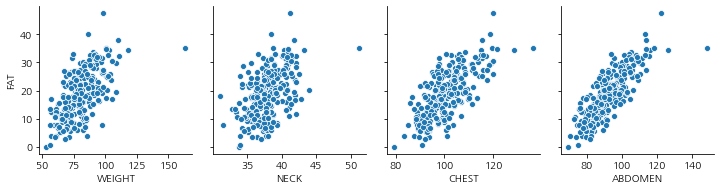

In [7]:
sns.pairplot(df_bmi, y_vars="FAT",x_vars=["WEIGHT", "NECK", "CHEST","ABDOMEN"])
#타겟변수와의 경향성을 파악할 수 있다. 선형성

In [8]:
#sns.pairplot(df_bmi)

In [9]:
df_bmi.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


체질 비만도(FAT)와 가슴 둘레, 복부 둘레 간의 높은 성형관계 확인
설명변수 상관관계: 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

In [10]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + \
                        ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI", data = df_raw)


reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.49e-63
Time:                        18:57:37   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

분산분석결과 p값이 유의수준 0.05보다 작음으로 회귀모델로서 유의
설명력 0.749

# 다중회귀
회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [11]:
df_bmi_x = df_bmi.drop(["FAT"],axis = 1)
df_bmi_x_const = add_constant(df_bmi_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_bmi_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_bmi_x_const.values,i) for i in range(df_bmi_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


다중공선성이 가장 높은 몸무게 제거

In [12]:
df_bmi_x = df_bmi.drop(["FAT","WEIGHT"],axis = 1)
df_bmi_x_const = add_constant(df_bmi_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_bmi_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_bmi_x_const.values,i) for i in range(df_bmi_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


후진제거법을 이용한 변수 선택 하지만 BMI가 제거됨으로

In [13]:
df_bmi_y = df_bmi["FAT"]
model = LinearRegression()


rfe = RFE(estimator = model, n_features_to_select= 5).fit(df_bmi_x,df_bmi_y)



selected_cols = df_bmi_x.columns[rfe.support_]

removed_cols = df_bmi_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))


Selected Variables : Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [14]:
selected_cols

Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')

In [15]:
obj=pd.Series(range(6),index=['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST','BMI'])
selected_cols = obj.index

print("Selected Variables : {}".format(selected_cols))

Selected Variables : Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')


# BMI를 넣어줌

In [16]:
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST + BMI", data = df_bmi)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.94e-67
Time:                        18:57:43   Log-Likelihood:                -725.88
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     245   BIC:                             1490.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2743      6.230      0.526      0.6

<AxesSubplot:>

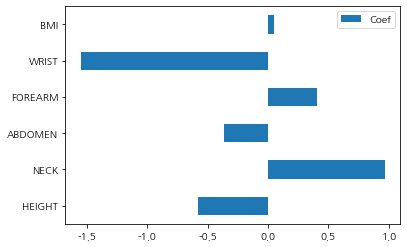

In [17]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, \
                          index = selected_cols)

df_reg_coef.plot.barh(y="Coef",legend = True)

In [18]:
scaler = StandardScaler()
cols = df_bmi_x.columns
np_scaled = scaler.fit_transform(df_bmi_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"] = df_bmi["FAT"]
reg_model_scaled = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST + BMI",data=df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.94e-67
Time:                        18:57:44   Log-Likelihood:                -725.88
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     245   BIC:                             1490.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.509      0.0

<AxesSubplot:>

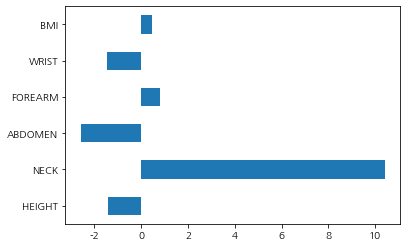

In [19]:

df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend = False)

# 최종 모델의 회귀식 
Y = 19.1508 -1.4027*NECK +10.4206*ABDOMEN -2.5960*HIP + 0.8126*FOREARM -1.4455*WRIST +0.4509BMI

# 2.의사결정나무
콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라.
데이터: Concrete.csv
목표변수 콘크리트강도

In [20]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/Concrete.csv", engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
#x
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

# 트레인과 테스트셋을 0.7과 0.3 으로 나눔으로써 테스트셋을 0.3 준비함
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [22]:
## 적절하게 나뉜것을 확인할 수 있음
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test validation X size: {}".format(df_validation_x.shape))
print("test validation Y size: {}".format(df_validation_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (412, 8)
train data Y size: (412,)
test validation X size: (309, 8)
test validation Y size: (309,)
test data X size: (309, 8)
test data Y size: (309,)


In [23]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeRegressor(random_state=1234)

In [24]:
#customize 하기 전의 트리 점수
print("Score on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.705


In [25]:
train_score = []; validation_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

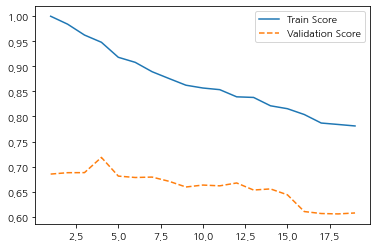

In [26]:

df_score_leaf.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,validation_score,linestyle ='--', label = "Validation Score")
plt.legend()

# 해석해보면min_samples_leaf는 3~4 정도가 적합할거같음

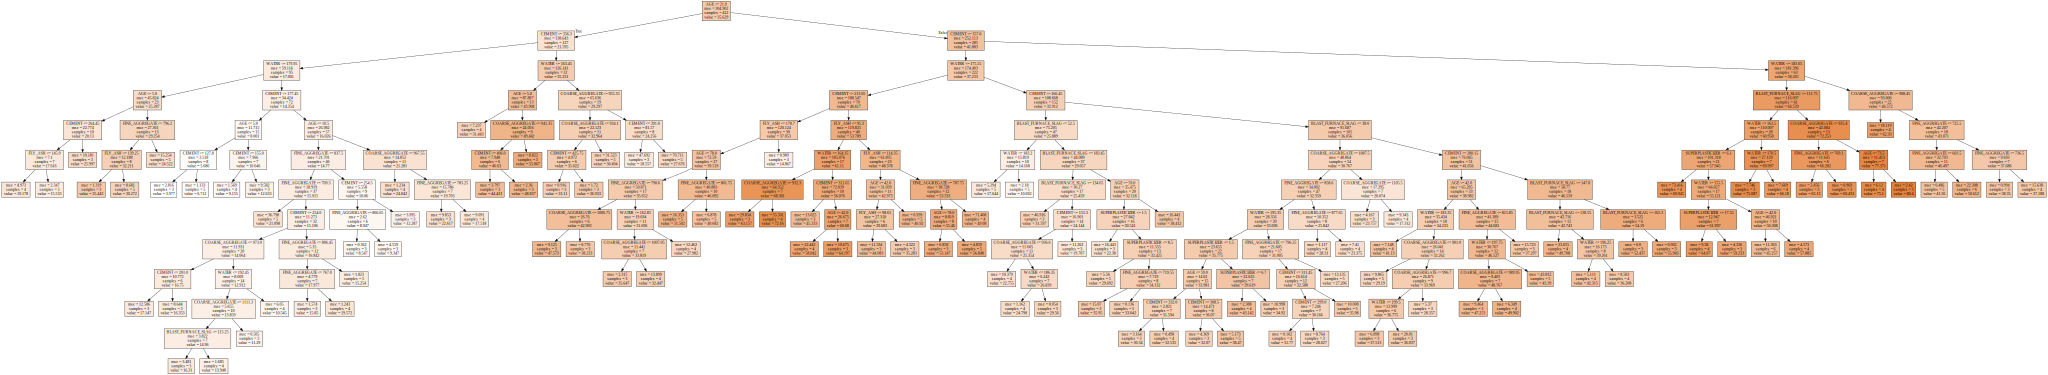

In [27]:
v_feature_name = df_validation_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

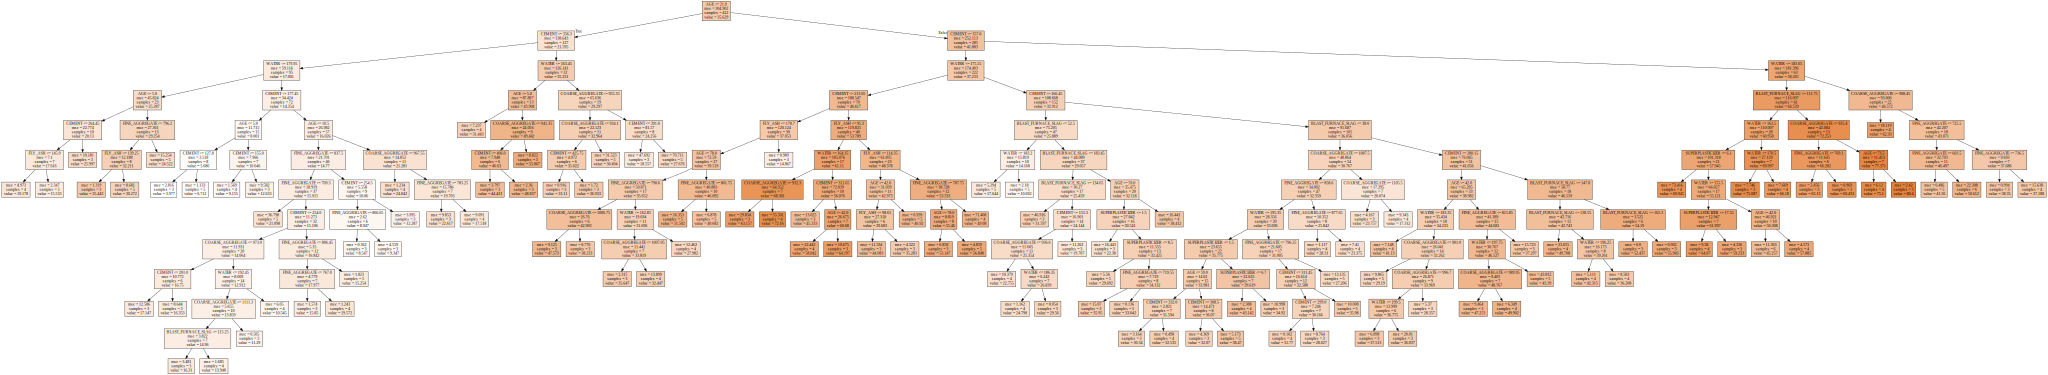

In [28]:
v_feature_name = df_validation_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [29]:
train_score = []; validation_score=[]
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=3,
                                min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

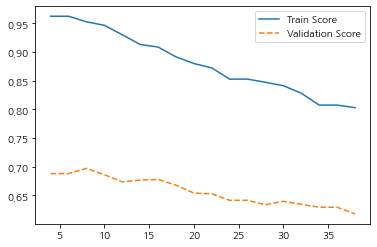

In [30]:

df_score_leaf.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,validation_score,linestyle ='--', label = "Validation Score")
plt.legend()

# min_samples_split은 23정도가 적합해 보임

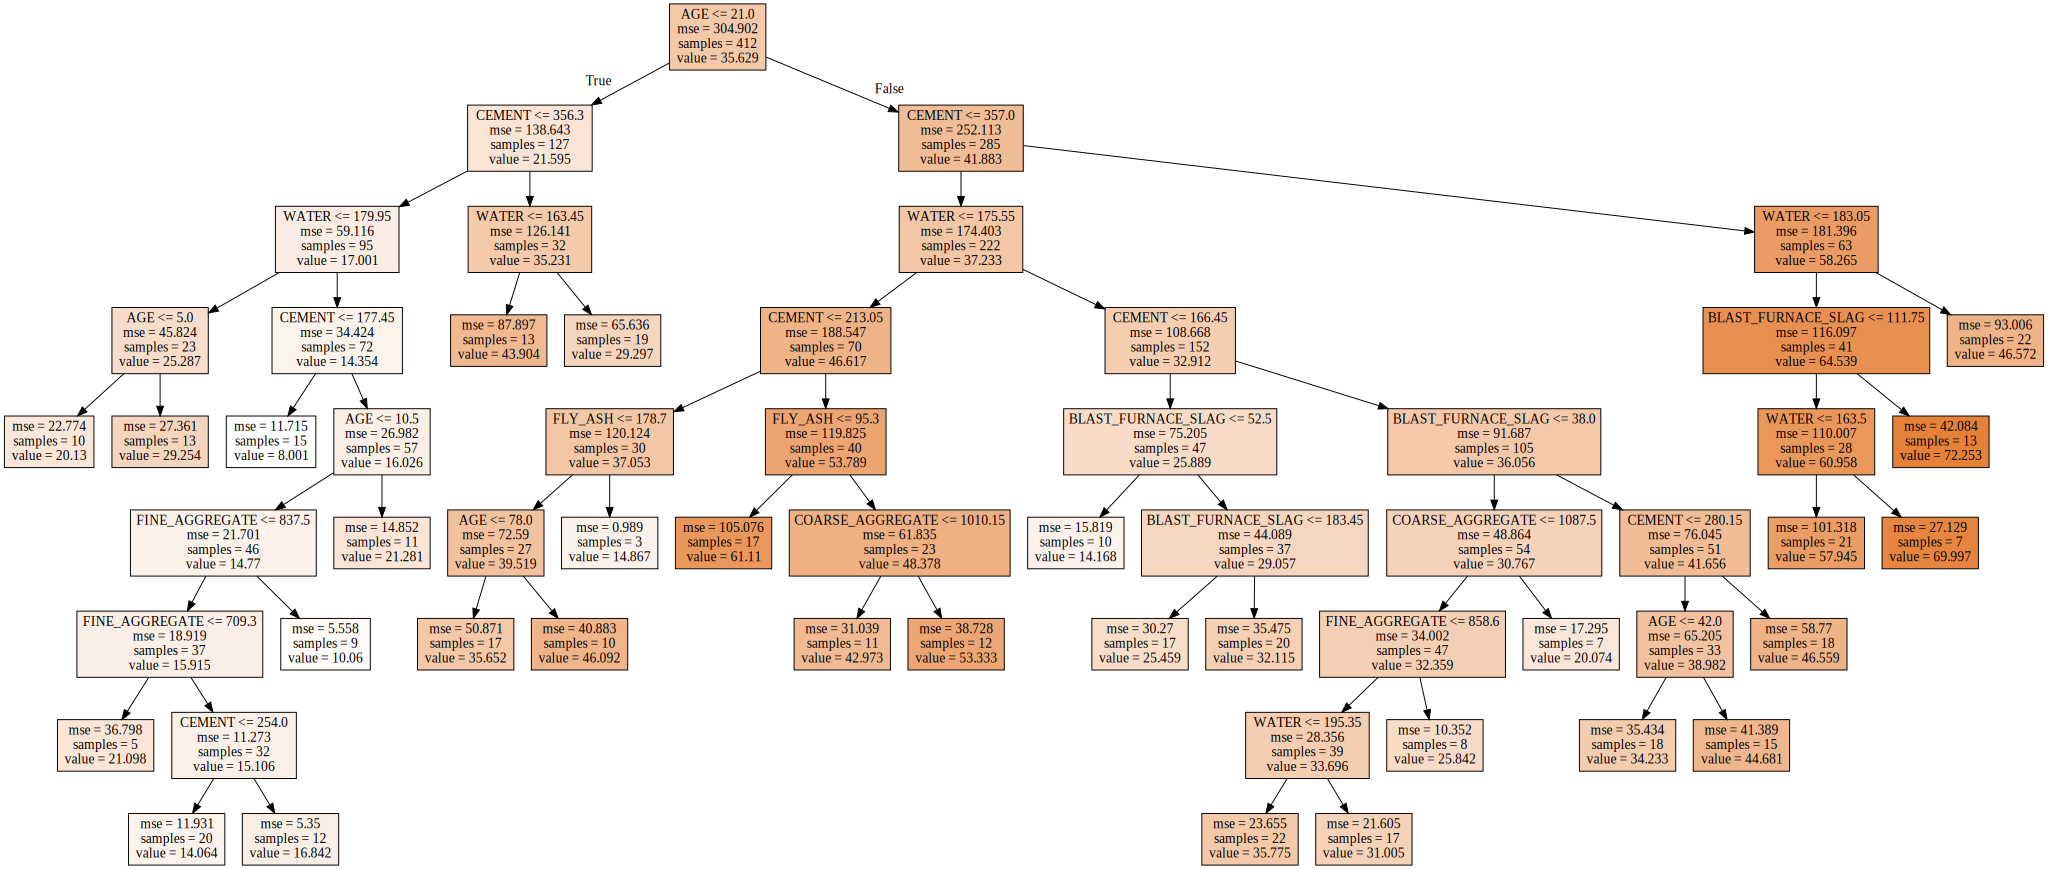

In [31]:
v_feature_name = df_validation_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 3, min_samples_split=23)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_split.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

# 위의 트리는 전보다 훨씬 균형잡힌것을 볼수있음

In [32]:
train_score = []; validation_score=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=3,
                                min_samples_split=23,
                                max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

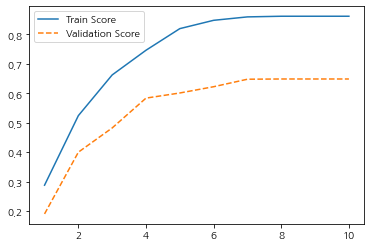

In [33]:

df_score_leaf.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,validation_score,linestyle ='--', label = "Validation Score")
plt.legend()

# 최대 깊이 증가에 따라 모델의 설명력은 증가하며 Train/validation 데이터의 성능 변화를 고려하여 4 선택

# 최종트리

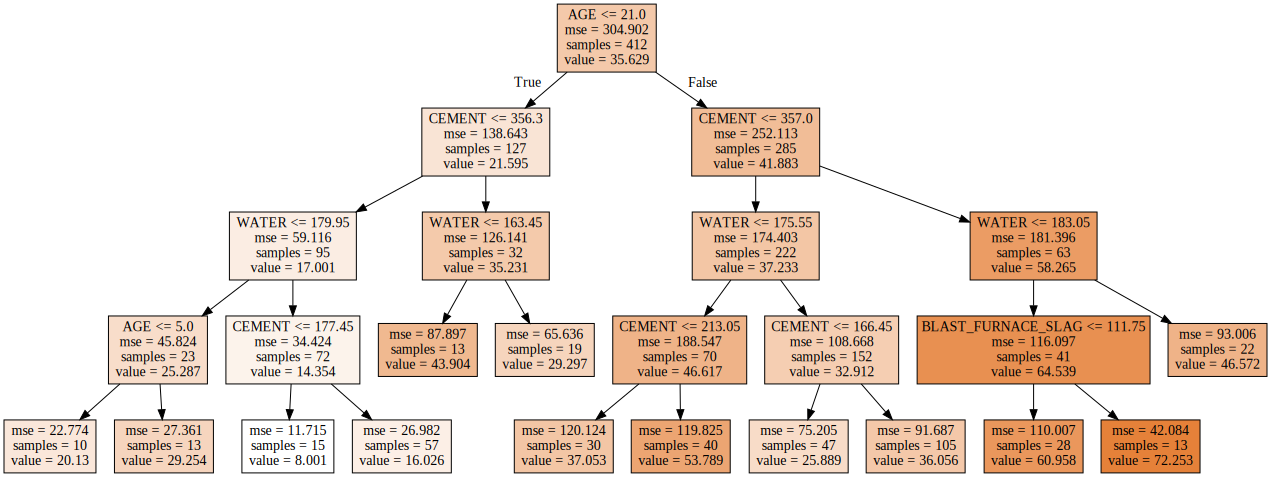

In [34]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234,
                            min_samples_leaf=3,
                            min_samples_split=23,
                            max_depth=4)
    
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_final.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [35]:
tree_final = DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=23, max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)
print("Score on Training set:{:.3}".format(tree_final.score(df_train_x,df_train_y)))

print("Score on Test set:{:.3}".format(tree_final.score(df_test_x,df_test_y)))

Score on Training set:0.746
Score on Test set:0.651


중요 Feature 확인

In [36]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.412
7,AGE,0.391
3,WATER,0.185
1,BLAST_FURNACE_SLAG,0.012
2,FLY_ASH,0.000
4,SUPERPLASTICIZER,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, '변수')

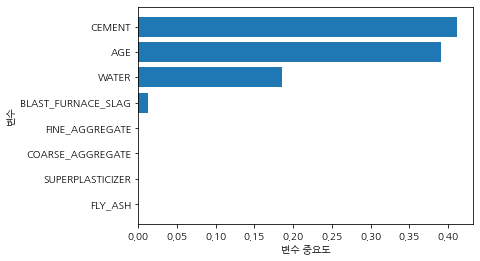

In [37]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결론!! 콘크리트 강도에 가장 영향을 미치는 TOP3는 CEMENT,AGE,WATER이다.

# 랜덤 포레스트 
콘크리트 강도를 예측하는 랜덤 포레스트 모델

In [38]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/Concrete.csv", engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
#x
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

# 트레인과 테스트셋을 0.7과 0.3 으로 나눔으로써 테스트셋을 0.3 준비함
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [40]:
## 적절하게 나뉜것을 확인할 수 있음
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test validation X size: {}".format(df_validation_x.shape))
print("test validation Y size: {}".format(df_validation_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (412, 8)
train data Y size: (412,)
test validation X size: (309, 8)
test validation Y size: (309,)
test data X size: (309, 8)
test data Y size: (309,)


In [41]:
rf_uncustomized = RFR(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

RandomForestRegressor(random_state=1234)

In [42]:
#customize 하기 전의 트리 점수
print("Score on traing set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_validation_x,df_validation_y)))

Score on traing set:0.982
Score on test set:0.821


In [43]:
train_score = []; validation_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf = RFR(random_state=1234,
                                n_estimators=v_n_estimators)
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    

    
df_score_tree = pd.DataFrame()
df_score_tree["n_estimator"] = para_n_tree
df_score_tree["TrainScore"] = train_score
df_score_tree["ValidationScore"] = validation_score

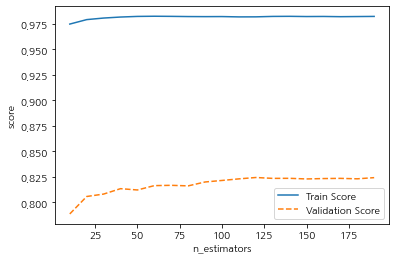

In [44]:

df_score_tree.round(3)

plt.plot(para_n_tree,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_n_tree,validation_score,linestyle ='--', label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# 해석해보면 트리 개수는 125개 정도가 적합할거같음

In [45]:
train_score = []; validation_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(random_state=1234,
             n_estimators=125,
             min_samples_leaf=v_min_samples_leaf
            )
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

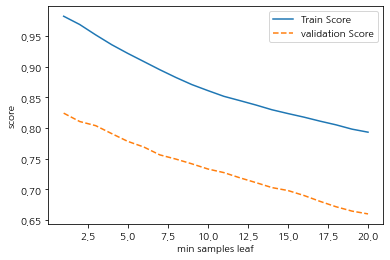

In [46]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,validation_score, linestyle ='--', label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#min_samples_leaf 는 10 정도가 적합할거같음

In [47]:
train_score = []; validation_score=[]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RFR(random_state=1234,
             n_estimators=125,
             min_samples_leaf=10,
             min_samples_split=v_min_samples_split
            )
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score

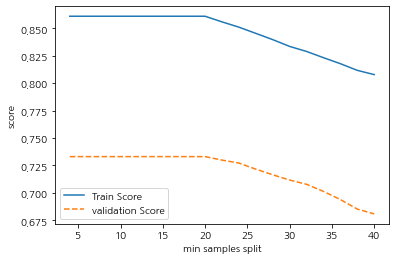

In [48]:
df_score_split.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,validation_score, linestyle ='--', label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
#split은 18정도가 적합해 보임

In [49]:
train_score = []; validation_score=[]

para_depth = [depth * 2 for depth in range(2,21)]

for v_max_depth in para_depth:
    rf = RFR(random_state=1234,
             n_estimators=125,
             min_samples_leaf=10,
             min_samples_split=18,
             max_depth=v_max_depth
            )
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidationScore"] = validation_score

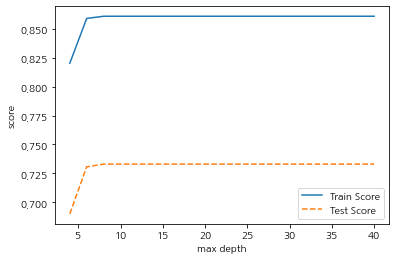

In [50]:
df_score_depth.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,validation_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [51]:
df_score_depth.round(3)
# depth는 5정도가 좋아보임

,Depth,TrainScore,ValidationScore
0,4,0.820,0.690
1,6,0.859,0.731
2,8,0.861,0.733
3,10,0.861,0.733
4,12,0.861,0.733
5,14,0.861,0.733
6,16,0.861,0.733
7,18,0.861,0.733
8,20,0.861,0.733
9,22,0.861,0.733


# 랜덤포레스트 최종 모델

In [52]:
rf_final = RFR(n_estimators = 125, min_samples_leaf=10, min_samples_split=18, max_depth=5, random_state=1234)
rf_final.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=18,
                      n_estimators=125, random_state=1234)

In [53]:
rf_final.fit(df_train_x,df_train_y)

print("Score on Training set:{:.3}".format(rf_final.score(df_train_x,df_train_y)))

print("Score on Test set:{:.3}".format(rf_final.score(df_test_x,df_test_y)))

Score on Training set:0.851
Score on Test set:0.773


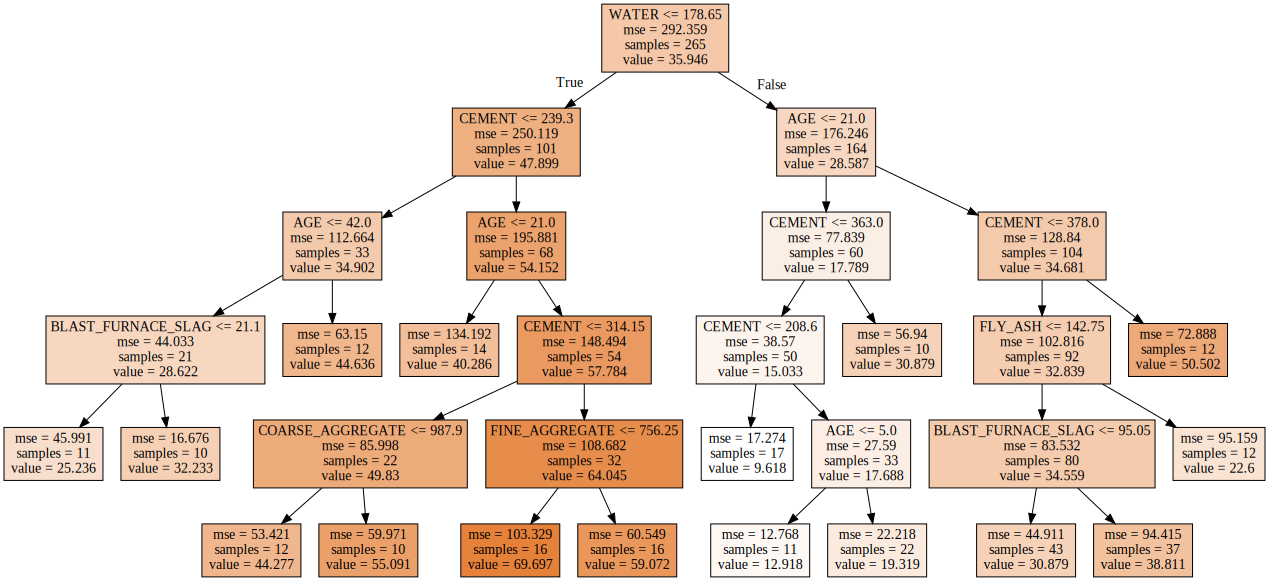

In [54]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rf_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_0.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

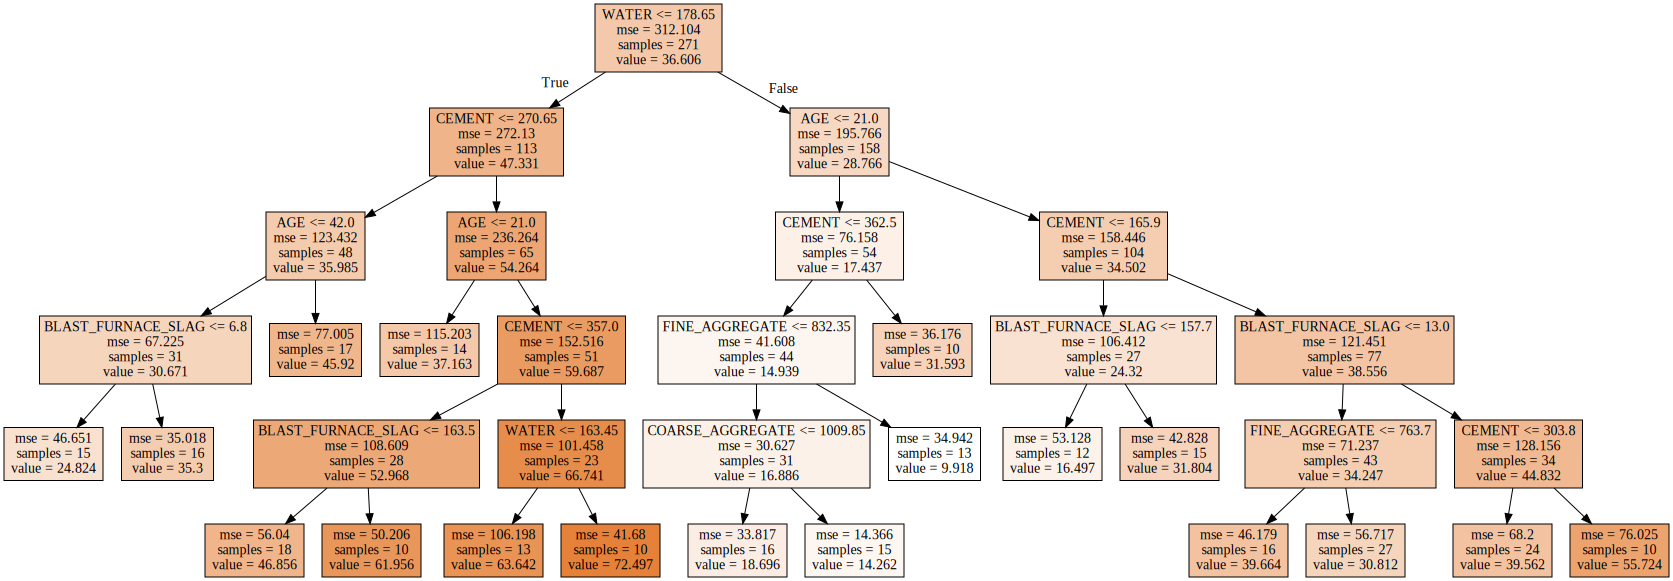

In [55]:

export_graphviz(rf_final.estimators_[10], out_file = "rf_final_10.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_10.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [56]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=rf_final.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.350
0,CEMENT,0.313
3,WATER,0.244
1,BLAST_FURNACE_SLAG,0.043
6,FINE_AGGREGATE,0.021
4,SUPERPLASTICIZER,0.013
2,FLY_ASH,0.010
5,COARSE_AGGREGATE,0.007


Text(0, 0.5, '변수')

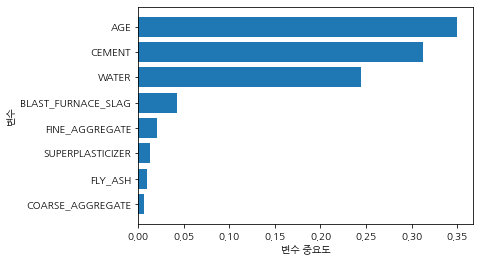

In [57]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결과를 확인해보면 콘크리트의 강도에 가장 큰 영향을 끼치는 요소는 AGE,CEMENT,WATER로 조금 순위와 중요도가 달라진것을 볼수있음